# Introduction

In this report, we are going to analyze the bitcoin dataset.

## Import libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import Dataset

In [41]:
bitcoin = pd.read_csv('data/bitcoin_train.csv')

In [42]:
bitcoin.head()

,Unnamed: 0,address,year,day,length,weight,count,looped,neighbors,income,label
0,0,1BpvJgUs7UprQu9z8fLsP7pFvFcCscHRCV,2011,287,2,0.250000,1,0,2,3.009500e+08,white
1,1,1EnSeTPjMxZm9X9iQDYmMUDoLQQ3ouDN6F,2015,77,0,1.000000,1,0,1,4.820000e+07,white
2,2,1mwkhYHeoqGBkVW84yFpYCSqRDt5TWSBQ,2011,164,52,0.000977,23,0,2,2.349582e+10,white
3,3,19XUCsxgpHZGXKLgVMpdoyZqcFdeM3pGeE,2014,86,144,0.000001,1555,1152,2,9.581274e+07,white
4,4,14Ef6MGSYLEbigo55CpPBGEGSGYwwB7xhY,2015,261,6,0.250000,1,0,2,3.424024e+07,white


In [43]:
bitcoin.shape

(2333357, 11)

In [44]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333357 entries, 0 to 2333356
Data columns (total 11 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   address     object 
 2   year        int64  
 3   day         int64  
 4   length      int64  
 5   weight      float64
 6   count       int64  
 7   looped      int64  
 8   neighbors   int64  
 9   income      float64
 10  label       object 
dtypes: float64(2), int64(7), object(2)
memory usage: 195.8+ MB


In [45]:
bitcoin.describe()

,Unnamed: 0,year,day,length,weight,count,looped,neighbors,income
count,2.333357e+06,2.333357e+06,2.333357e+06,2.333357e+06,2.333357e+06,2.333357e+06,2.333357e+06,2.333357e+06,2.333357e+06
mean,1.166678e+06,2.014476e+03,1.814778e+02,4.504554e+01,5.456381e-01,7.223780e+02,2.387287e+02,2.213161e+00,4.383004e+09
std,6.735823e+05,2.257312e+00,1.039893e+02,5.900348e+01,3.652788e+00,1.689861e+03,9.670131e+02,1.888230e+01,1.520211e+11
min,0.000000e+00,2.011000e+03,1.000000e+00,0.000000e+00,1.420108e-90,1.000000e+00,0.000000e+00,1.000000e+00,3.000000e+07
25%,5.833390e+05,2.013000e+03,9.200000e+01,2.000000e+00,2.152083e-02,1.000000e+00,0.000000e+00,1.000000e+00,7.434000e+07
50%,1.166678e+06,2.014000e+03,1.810000e+02,8.000000e+00,2.500000e-01,1.000000e+00,0.000000e+00,2.000000e+00,2.000000e+08
75%,1.750017e+06,2.016000e+03,2.710000e+02,1.080000e+02,8.794643e-01,5.700000e+01,0.000000e+00,2.000000e+00,9.940669e+08
max,2.333356e+06,2.018000e+03,3.650000e+02,1.440000e+02,1.943749e+03,1.449700e+04,1.449600e+04,1.292000e+04,4.982447e+13


# Data Cleaning


In [46]:
bitcoin.columns

Index(['Unnamed: 0', 'address', 'year', 'day', 'length', 'weight', 'count',
       'looped', 'neighbors', 'income', 'label'],
      dtype='object')

In [47]:
bitcoin = bitcoin.drop(["day", "year", 'Unnamed: 0','address'],axis=1)
bitcoin.head()

,length,weight,count,looped,neighbors,income,label
0,2,0.250000,1,0,2,3.009500e+08,white
1,0,1.000000,1,0,1,4.820000e+07,white
2,52,0.000977,23,0,2,2.349582e+10,white
3,144,0.000001,1555,1152,2,9.581274e+07,white
4,6,0.250000,1,0,2,3.424024e+07,white


In [48]:
bitcoin.isnull().sum()

length       0
weight       0
count        0
looped       0
neighbors    0
income       0
label        0
dtype: int64

In [49]:
bitcoin['label'].unique()

array(['white', 'CryptoWall', 'Cerber', 'CryptoLocker', 'Locky',
       'DMALockerv3', 'Globe', 'CryptXXX', 'DMALocker', 'WannaCry',
       'NoobCrypt', 'Razy', 'Flyper', 'KeRanger', 'GlobeImposter',
       'SamSam', 'CryptoTorLocker2015', 'VenusLocker', 'Globev3', 'Sam',
       'APT', 'XLockerv5.0', 'JigSaw', 'CryptConsole', 'EDA2',
       'XTPLocker', 'XLocker', 'Jigsaw', 'ComradeCircle'], dtype=object)

In [50]:
to_replace = ['Globe', 'WannaCry',
       'NoobCrypt', 'Razy', 'Flyper', 'KeRanger', 'GlobeImposter',
       'SamSam', 'CryptoTorLocker2015', 'VenusLocker', 'Globev3', 'Sam',
       'APT', 'XLockerv5.0', 'JigSaw', 'CryptConsole', 'EDA2',
       'XTPLocker', 'XLocker', 'Jigsaw', 'ComradeCircle']

In [51]:
bitcoin = bitcoin.replace(to_replace, "other")

In [52]:
bitcoin['label'].unique()

array(['white', 'CryptoWall', 'Cerber', 'CryptoLocker', 'Locky',
       'DMALockerv3', 'other', 'CryptXXX', 'DMALocker'], dtype=object)

In [53]:
bitcoin.loc[~(bitcoin['label'] == 'white')].groupby("label").count().sort_values(by="count", ascending = False)

,length,weight,count,looped,neighbors,income
label,,,,,,
CryptoWall,9872,9872,9872,9872,9872,9872
CryptoLocker,7422,7422,7422,7422,7422,7422
Cerber,7381,7381,7381,7381,7381,7381
Locky,5320,5320,5320,5320,5320,5320
CryptXXX,1933,1933,1933,1933,1933,1933
other,661,661,661,661,661,661
DMALockerv3,290,290,290,290,290,290
DMALocker,210,210,210,210,210,210


# Data Visualization

In [54]:
bitcoin.index

RangeIndex(start=0, stop=2333357, step=1)

In [55]:
white_bt = bitcoin.loc[bitcoin['label'] == 'white']
non_white_bt = bitcoin.loc[~(bitcoin['label'] == 'white')]

In [17]:
white_bt

,length,weight,count,looped,neighbors,income,label
0,2,0.250000,1,0,2,3.009500e+08,white
1,0,1.000000,1,0,1,4.820000e+07,white
2,52,0.000977,23,0,2,2.349582e+10,white
3,144,0.000001,1555,1152,2,9.581274e+07,white
4,6,0.250000,1,0,2,3.424024e+07,white
...,...,...,...,...,...,...,...
2333352,10,0.062500,1,0,1,5.140488e+07,white
2333353,144,0.003251,6066,0,2,1.000000e+08,white
2333354,20,0.002604,2,0,2,3.324864e+09,white
2333355,0,1.000000,1,0,2,1.045210e+09,white


In [67]:
market_share = non_white_bt.groupby('label').count()['count'].sort_values(ascending=False)
market_share_freq = market_share / market_share.sum()
market_share_freq = market_share_freq.to_frame(name = "Proportion of Transactions")
market_share_freq

,Proportion of Transactions
label,
CryptoWall,0.298347
CryptoLocker,0.224304
Cerber,0.223065
Locky,0.160779
CryptXXX,0.058418
other,0.019976
DMALockerv3,0.008764
DMALocker,0.006347


In [65]:
market_share.to_frame("Number of Transactions")

,Number of Transactions
label,
CryptoWall,9872
CryptoLocker,7422
Cerber,7381
Locky,5320
CryptXXX,1933
other,661
DMALockerv3,290
DMALocker,210


In [19]:
market_share_freq.index

Index(['CryptoWall', 'CryptoLocker', 'Cerber', 'Locky', 'CryptXXX', 'other',
       'DMALockerv3', 'DMALocker'],
      dtype='object', name='label')

Text(0.5, 0, 'Ransomware Family')

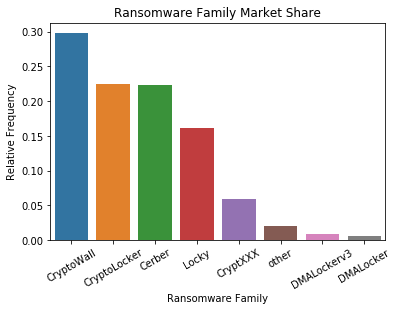

In [20]:
fig = sns.barplot(data = market_share_freq, x = market_share_freq.index, y = "count")
fig.set_xticklabels(fig.get_xticklabels(), rotation = 30)
fig.set_title("Ransomware Family Market Share")
fig.set_ylabel("Relative Frequency")
fig.set_xlabel("Ransomware Family")

In [68]:
white_bt.describe()

,length,weight,count,looped,neighbors,income
count,2.300268e+06,2.300268e+06,2.300268e+06,2.300268e+06,2.300268e+06,2.300268e+06
mean,4.509420e+01,5.444412e-01,7.241337e+02,2.407700e+02,2.215242e+00,4.434690e+09
std,5.900971e+01,3.662059e+00,1.693346e+03,9.716880e+02,1.901544e+01,1.530985e+11
min,0.000000e+00,1.420108e-90,1.000000e+00,0.000000e+00,1.000000e+00,3.000000e+07
25%,2.000000e+00,2.115024e-02,1.000000e+00,0.000000e+00,1.000000e+00,7.409540e+07
50%,8.000000e+00,2.500000e-01,1.000000e+00,0.000000e+00,2.000000e+00,2.000000e+08
75%,1.100000e+02,8.750000e-01,5.700000e+01,0.000000e+00,2.000000e+00,1.000000e+09
max,1.440000e+02,1.943749e+03,1.449700e+04,1.449600e+04,1.292000e+04,4.982447e+13


In [69]:
non_white_bt.describe()

,length,weight,count,looped,neighbors,income
count,33089.000000,3.308900e+04,33089.000000,33089.000000,33089.000000,3.308900e+04
mean,41.663332,6.288456e-01,600.326664,96.825440,2.068482,7.899050e+08
std,58.469971,2.936194e+00,1421.544219,533.524049,2.395702,1.564229e+10
min,0.000000,4.719723e-42,1.000000,0.000000,1.000000,3.000000e+07
25%,0.000000,6.057385e-02,1.000000,0.000000,1.000000,8.000000e+07
50%,6.000000,3.853625e-01,1.000000,0.000000,2.000000,1.250000e+08
75%,80.000000,1.000000e+00,14.000000,0.000000,2.000000,3.000000e+08
max,144.000000,4.982885e+02,12922.000000,11693.000000,94.000000,2.595000e+12


In [62]:
num_white = bitcoin.loc[(bitcoin['label'] == 'white')].shape[0]
num_ransom = bitcoin.shape[0] - num_white
basic = pd.DataFrame({'category':['white', 'ransom'], 'count':[num_white, num_ransom]})
basic

,category,count
0,white,2300268
1,ransom,33089


Text(0.5, 1, 'Correlation between White-labeled data')

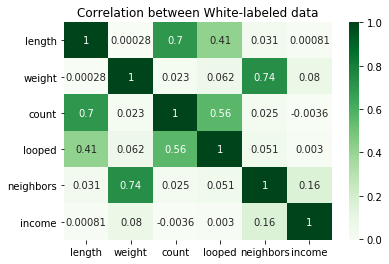

In [60]:
ax = plt.axes()
sns.heatmap(white_bt.corr(),annot=True,cmap="Greens")
ax.set_title("Correlation between White-labeled data")

Text(0.5, 1, 'Correlation between Non-White-labeled data')

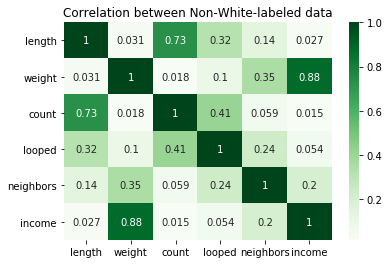

In [61]:
ax = plt.axes()
sns.heatmap(non_white_bt.corr(),annot=True,cmap="Greens")
ax.set_title("Correlation between Non-White-labeled data")

# Data Analysis

# Predictive Model

# Proposal

# Conclusion